In [12]:
import pandas as pd
from matplotlib import pyplot as plt

# reading the dataset
df = pd.read_csv("../1_datasets/raw_fake_jobs/fake_job_postings.csv")

# extracting only fraudulent jobs
fake_jobs = df[df["fraudulent"] == 1].copy()

# number of fake posts
print("Total fake jobs detected:", len(fake_jobs))

Total fake jobs detected: 866


In [ ]:
# words that have high frequency but have no
# actual weight so it is better to extract them
stopwords = {
    "the",
    "and",
    "to",
    "for",
    "a",
    "in",
    "is",
    "on",
    "with",
    "company",
    "role",
    "job",
    "position",
    "bachelors",
    "you",
    "are",
    "our",
    "your",
    "am",
    "from",
    "all",
    "that",
    "have",
    "been",
    "will",
    "this",
    "their",
    "not",
    "per",
    "can",
    "who",
    "into",
}


def clean_text(text):
    # checks if the input text is Nan, None,
    # Nat and returns an empty string incase
    # CSV file had empty cells
    if pd.isna(text):
        return ""

    # converts to lowercase
    text = str(text).lower()
    # removes all characters except for alphabets and spaces
    text = "".join([char for char in text if char.isalpha() or char == " "])

    # removes stopwords
    words = [word for word in text.split() if word not in stopwords and len(word) > 2]  # noqa: E501

    # returns a string and consumes less memory
    return " ".join(words)


# process all column and combine words
all_words = []

for col in [
    "company_profile",
    "description",
    "requirements",
    "benefits",
    "telecommuting",
    "required_experience",
]:
    cleaned_text = fake_jobs[col].apply(clean_text).dropna()
    for row in cleaned_text:
        all_words.extend(row.split())

# check frequency
word_counts = pd.Series(all_words).value_counts()

# convert to a DataFrame
freq_df = pd.DataFrame(word_counts).reset_index()
freq_df.columns = ["word", "count"]

# save the data in a csv file
path_file = "../1_datasets/cleaned_fake_most_frequent_words/words_count.csv"

freq_df.to_csv(path_file, index=False)

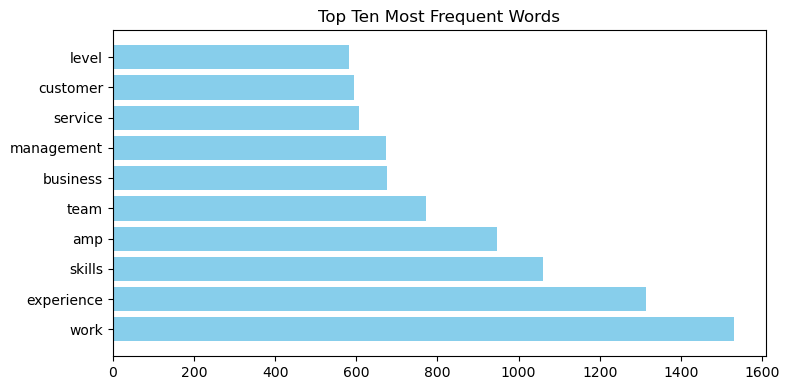

In [ ]:
# reading the file
df = pd.read_csv("../1_datasets/cleaned_fake_most_frequent_words/words_count.csv")  # noqa: E501

top10 = df.head(10)

# plot histogram
plt.figure(figsize=(8, 4))
plt.barh(top10["word"], top10["count"], color="skyblue")
plt.title("Top Ten Most Frequent Words")
plt.tight_layout()

# save diagram in a png file
dia_file = "../1_datasets/cleaned_fake_most_frequent_words/visual_words_count.png"  # noqa: E501

plt.savefig(dia_file)

plt.show()